 #              Internship Assignment for Perfectice Eduventure Limited

Problem Statement chosen- Predict score in a test and challenge student to beat it.

In [11]:
from pymongo import MongoClient
client = MongoClient()

client = MongoClient('localhost', 27017)
db = client.dbBackup 

For the given task I will be working on the database of attempts. It has the details that I will be using to create a neural network. 

In [24]:
database = db.attempts
attempts = pd.DataFrame(list(database.find()))

In [25]:
#Viewing the head of the dataframe
attempts.head()

,__v,_id,attemptType,attemptdetails,createdAt,createdBy,email,idOffline,isAbandoned,isAnsync,...,totalCorrects,totalErrors,totalMark,totalMarkeds,totalMissed,totalQuestions,totalTime,updatedAt,user,userId
0,0,5b851ff7dd6c9c8cedb051d3,NaN,5b851ff7dd6c9c400eb051d4,2018-08-28 09:17:00.084,"{'user': 5b3e0266a14b7e000d9cc040, 'name': 'te...",None,None,False,True,...,25,9,25.0,0,21,55,3299999,2018-08-28 10:12:21.337,5b82922cdd6c9c2801b00f20,NaN
1,0,5b851ffdb0a5d1ad413d8301,NaN,5b851ffdb0a5d17a103d8302,2018-08-28 09:23:57.839,"{'user': 5b3e0266a14b7e000d9cc040, 'name': 'te...",None,None,False,True,...,35,20,35.0,0,0,55,2887958,2018-08-28 10:12:25.489,5b82922edd6c9c6e6db00fb0,NaN
2,0,5b852003b0a5d136aa3d8371,NaN,5b852003b0a5d190863d8372,2018-08-28 09:17:11.950,"{'user': 5b3e0266a14b7e000d9cc040, 'name': 'te...",None,None,False,True,...,31,24,31.0,0,0,55,3300006,2018-08-28 10:12:39.239,5b829227dd6c9c4c7fb00da0,NaN
3,0,5b85200948598b0aa6eabf57,NaN,5b85200948598b0d5beabf58,2018-08-28 09:17:16.906,"{'user': 5b3e0266a14b7e000d9cc040, 'name': 'te...",None,None,False,True,...,16,19,16.0,0,20,55,3300005,2018-08-28 10:12:38.440,5b82922edd6c9cd998b00f86,NaN
4,0,5b852014b0a5d10fc33d83e4,NaN,5b852014b0a5d11fd13d83e5,2018-08-28 09:17:28.725,"{'user': 5b3e0266a14b7e000d9cc040, 'name': 'te...",None,None,False,True,...,29,15,29.0,0,11,55,3300049,2018-08-28 10:12:59.708,5b82922add6c9c5f61b00e6a,NaN


On first basic analysis of the dataframe, we need to remove some of the column or features that do not affect the results in terms of marks of a particular student. 

In [26]:
# Removing the non effective columns
attempts=attempts.drop('__v',axis=1)
attempts=attempts.drop('_id',axis=1)
attempts=attempts.drop('subjects',axis=1)
attempts=attempts.drop('attemptdetails',axis=1)
attempts=attempts.drop('practiceSetInfo',axis=1)
attempts=attempts.drop('createdBy',axis=1)
attempts=attempts.drop('attemptType',axis=1)
attempts=attempts.drop('createdAt',axis=1)
attempts=attempts.drop('email',axis=1)
attempts=attempts.drop('idOffline',axis=1)
attempts=attempts.drop('practicesetId',axis=1)
attempts=attempts.drop('studentName',axis=1)
attempts=attempts.drop('updatedAt',axis=1)
attempts=attempts.drop('user',axis=1)
attempts=attempts.drop('userId',axis=1)

In [27]:
#Now we need to see the datatypes of all the columns present
attempts.info()    

#Ensuring that there is no object type column is a must as we will be making a ANN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 19 columns):
isAbandoned        35737 non-null bool
isAnsync           35737 non-null bool
isCratedOffline    35737 non-null bool
isEvaluated        35737 non-null bool
isShowAttempt      35737 non-null bool
isfraudelent       35737 non-null bool
maximumMarks       35737 non-null int64
minusMark          35737 non-null float64
offscreenTime      35737 non-null int64
partial            35737 non-null int64
pending            35737 non-null int64
plusMark           35737 non-null int64
totalCorrects      35737 non-null int64
totalErrors        35737 non-null int64
totalMark          35737 non-null float64
totalMarkeds       35737 non-null int64
totalMissed        35737 non-null int64
totalQuestions     35737 non-null int64
totalTime          35737 non-null int64
dtypes: bool(6), float64(2), int64(11)
memory usage: 3.7 MB


In [30]:
#Making a duplicate dataframe so that we can revert back in case of any processing that needs to be undone
df=attempts.copy()

#Seeing the missing values
for x in df.columns:
    if df[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,df[x].isnull().values.ravel().sum()))
    else:
        print("no missing value in the column- "+x)

no missing value in the column- isAbandoned
no missing value in the column- isAnsync
no missing value in the column- isCratedOffline
no missing value in the column- isEvaluated
no missing value in the column- isShowAttempt
no missing value in the column- isfraudelent
no missing value in the column- maximumMarks
no missing value in the column- minusMark
no missing value in the column- offscreenTime
no missing value in the column- partial
no missing value in the column- pending
no missing value in the column- plusMark
no missing value in the column- totalCorrects
no missing value in the column- totalErrors
no missing value in the column- totalMark
no missing value in the column- totalMarkeds
no missing value in the column- totalMissed
no missing value in the column- totalQuestions
no missing value in the column- totalTime


No mssing value means that we have completed first phase of our preprocessing. Now we need to make the data trainable by applying further preprocessing methods.

In [31]:
# Analyzing the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 19 columns):
isAbandoned        35737 non-null bool
isAnsync           35737 non-null bool
isCratedOffline    35737 non-null bool
isEvaluated        35737 non-null bool
isShowAttempt      35737 non-null bool
isfraudelent       35737 non-null bool
maximumMarks       35737 non-null int64
minusMark          35737 non-null float64
offscreenTime      35737 non-null int64
partial            35737 non-null int64
pending            35737 non-null int64
plusMark           35737 non-null int64
totalCorrects      35737 non-null int64
totalErrors        35737 non-null int64
totalMark          35737 non-null float64
totalMarkeds       35737 non-null int64
totalMissed        35737 non-null int64
totalQuestions     35737 non-null int64
totalTime          35737 non-null int64
dtypes: bool(6), float64(2), int64(11)
memory usage: 3.7 MB


In [32]:
# Mapping the Boolean type values to int type values i.e. True->1 and False->0
df.isAbandoned = df.isAbandoned.astype(int)
df.isAnsync = df.isAnsync.astype(int)
df.isCratedOffline = df.isCratedOffline.astype(int)
df.isEvaluated = df.isEvaluated.astype(int)
df.isShowAttempt = df.isShowAttempt.astype(int)
df.isfraudelent = df.isfraudelent.astype(int)

In [33]:
# Now we must have all the columns in our desired form of datatypes, checking it once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 19 columns):
isAbandoned        35737 non-null int32
isAnsync           35737 non-null int32
isCratedOffline    35737 non-null int32
isEvaluated        35737 non-null int32
isShowAttempt      35737 non-null int32
isfraudelent       35737 non-null int32
maximumMarks       35737 non-null int64
minusMark          35737 non-null float64
offscreenTime      35737 non-null int64
partial            35737 non-null int64
pending            35737 non-null int64
plusMark           35737 non-null int64
totalCorrects      35737 non-null int64
totalErrors        35737 non-null int64
totalMark          35737 non-null float64
totalMarkeds       35737 non-null int64
totalMissed        35737 non-null int64
totalQuestions     35737 non-null int64
totalTime          35737 non-null int64
dtypes: float64(2), int32(6), int64(11)
memory usage: 4.4 MB


All our datatypes are either int or float type and hence we are god to go to the next step

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text xticklabel objects>)

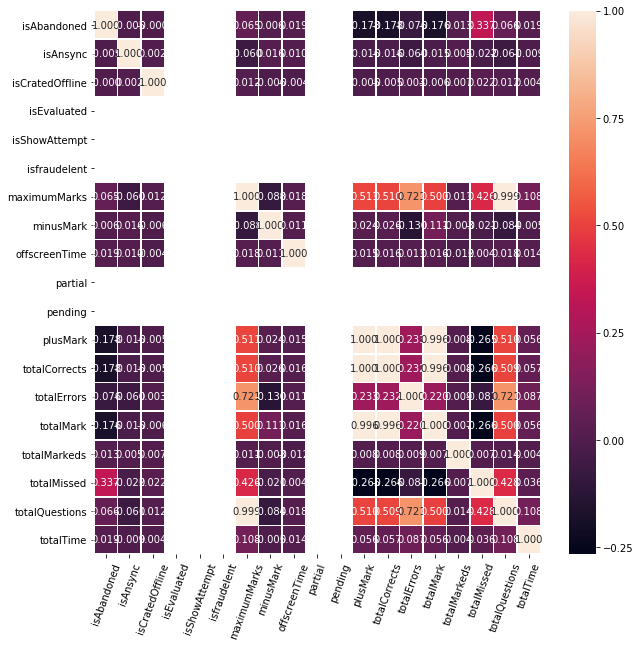

In [35]:
# Correlation Matrix for the given dataframe
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=70) 

White gaps represent that these columns have only one value throughout and so will not be affecting our results if we remove them and so we will be eliminatin those columns and then again verifying out results with a new correlation matrix.

In [36]:
# Removing single valued columns
df=df.drop('isEvaluated',axis=1)
df=df.drop('isShowAttempt',axis=1)
df=df.drop('isfraudelent',axis=1)
df=df.drop('partial',axis=1)
df=df.drop('pending',axis=1)  

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

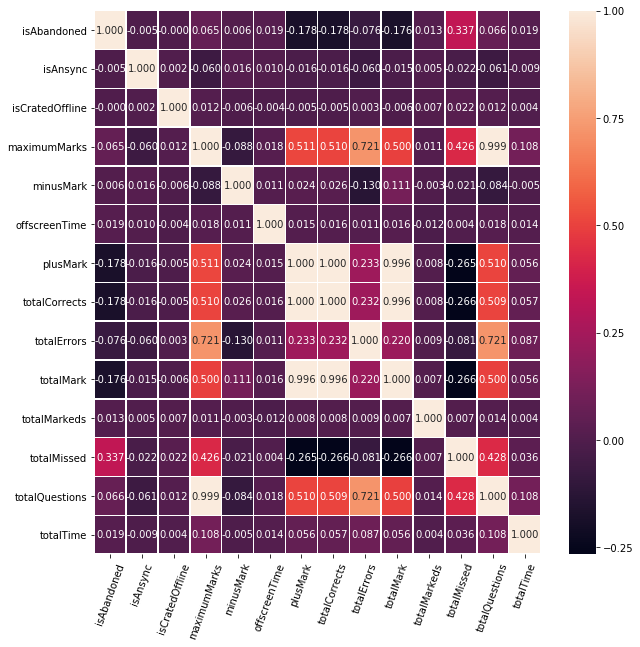

In [37]:
#Now again analyzing the correlation matrix
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=70)  


Columns named 'isAbandoned' , 'isAnsync' and 'isCratedOffline' can be neglected while making the ANN due to their weak correaltion with the other features that determine the final marks of a student.

In [38]:
#removing columns based on correlation matrix
df=df.drop('isAbandoned',axis=1)
df=df.drop('isAnsync',axis=1)
df=df.drop('isCratedOffline',axis=1)

In [39]:
#rearranging the columns to get our target column at the last
df=df[['maximumMarks', 'minusMark', 'offscreenTime', 'plusMark',
       'totalCorrects', 'totalErrors', 'totalMarkeds',
       'totalMissed', 'totalQuestions', 'totalTime', 'totalMark']]

In [40]:
#splitting our dataframe into depedent and independent variables
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [41]:
# Generating training(70%) and test set(30%) from the given data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [42]:
# Scaling the data for better and realiable results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Designing the ANN


In [43]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()
# Using relu or rectified linear units to add non- linearity to our model
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second and third hidden layer
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

# Compiling the ANN with the Adam optimizer to get the benefits of both AdaGrad and RMSProp
# We are also using the loss function as the mse or mean squared error

classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

classifier.summary()

Using TensorFlow backend.
C:\Users\MUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=12, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\MUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  
C:\Users\MUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


C:\Users\MUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`


In [52]:
# Fitting the ANN to the Training set
# Using a batch size of 64 and validation split of 20%
history=classifier.fit(X_train, y_train, batch_size = 64,validation_split=0.3, nb_epoch = 50)


Train on 17510 samples, validate on 7505 samples
Epoch 1/50
17510/17510 [==============================] - 0s 11us/step - loss: 0.0011 - acc: 0.9726 - val_loss: 0.0057 - val_acc: 0.9704
Epoch 2/50
  128/17510 [..............................] - ETA: 0s - loss: 0.0229 - acc: 0.9766

C:\Users\MUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


17510/17510 [==============================] - 0s 11us/step - loss: 0.0011 - acc: 0.9726 - val_loss: 0.0056 - val_acc: 0.9704
Epoch 3/50
17510/17510 [==============================] - 0s 10us/step - loss: 0.0011 - acc: 0.9726 - val_loss: 0.0056 - val_acc: 0.9704
Epoch 4/50
17510/17510 [==============================] - 0s 10us/step - loss: 0.0010 - acc: 0.9726 - val_loss: 0.0056 - val_acc: 0.9704
Epoch 5/50
17510/17510 [==============================] - 0s 10us/step - loss: 0.0010 - acc: 0.9726 - val_loss: 0.0056 - val_acc: 0.9704
Epoch 6/50
17510/17510 [==============================] - 0s 10us/step - loss: 0.0010 - acc: 0.9726 - val_loss: 0.0055 - val_acc: 0.9704
Epoch 7/50
17510/17510 [==============================] - 0s 13us/step - loss: 0.0010 - acc: 0.9726 - val_loss: 0.0055 - val_acc: 0.9704
Epoch 8/50
17510/17510 [==============================] - 0s 10us/step - loss: 0.0010 - acc: 0.9726 - val_loss: 0.0055 - val_acc: 0.9704
Epoch 9/50
17510/17510 [============================

In [ ]:
#Visualizing the test set accuracy and plotting a graph for the same
result = classifier.evaluate(X_test, y_test)
historydf = pd.DataFrame(history.history, index=history.epoch)

historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

In [54]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred=y_pred.round()


from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [55]:
# Note the value of RMS
rms

0.09762742236794585